<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Extraccion_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de características

## Análisis de la componente principal (PCA)

In [19]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [20]:
# Cargamos los datos
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
# Y mostramos algunas variables por pantalla
print(df.head())
print(df.describe())

   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
       mean radius  mean texture  ...  worst symmetry  worst fractal dimension
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
scaler.fit(df.values)
X_scaled = scaler.transform(df.values)
print("X_scaled:\n", X_scaled)

X_scaled:
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [30]:
# Vamos a utilizar las funciones de Sci-kit learn para análisis PCA
from sklearn.decomposition import PCA
# Para evaluar los resultados, utilizaremos el conjunto completo de variables 
pca = PCA(n_components=30, random_state=2020)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
# La variable anterior almacena los valores de los (30) componentes principales
print("X_pca:\n", X_pca)

# Puesto que seleccionamos el conjunto completo de variables las componenete 
# seleccionadas deben dar cuenta del 100% de la varianza en los datos
print("\n => Varianza explicada por las componentes:", sum(pca.explained_variance_ratio_ * 100))

X_pca:
 [[ 9.19283683e+00  1.94858307e+00 -1.12316616e+00 ... -3.39144536e-02
   4.56477199e-02 -4.71692081e-02]
 [ 2.38780180e+00 -3.76817174e+00 -5.29292687e-01 ...  3.26241827e-02
  -5.68742432e-03 -1.86787626e-03]
 [ 5.73389628e+00 -1.07517380e+00 -5.51747593e-01 ...  4.70258247e-02
   3.14589659e-03  7.50534755e-04]
 ...
 [ 1.25617928e+00 -1.90229671e+00  5.62730526e-01 ... -2.57775589e-03
   6.70621179e-03  3.77041667e-03]
 [ 1.03747941e+01  1.67201011e+00 -1.87702933e+00 ... -6.80863833e-02
  -8.41632764e-02 -2.37828222e-02]
 [-5.47524330e+00 -6.70636791e-01  1.49044308e+00 ... -9.51587894e-03
  -6.09131090e-02 -1.94755854e-02]]

 => Varianza explicada por las componentes: 100.00000000000001


Text(0, 0.5, 'Porcentaje de varianza explicado')

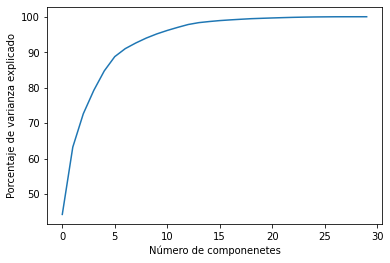

In [57]:
# Si representamos la varianza en función del número de componentes podemos observar
# cuál es el mínimo número de componenetes que necesitaremos para explicar un cierto
# porcentaje de la varianza
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Número de componenetes")
plt.ylabel("Porcentaje de varianza explicado")

In [40]:
# Vemos que con solo un tercio de las variables podemos explicar el 95% de la variaza
n_var = np.cumsum(pca.explained_variance_ratio_ * 100)[9]
print("Varianza 10 primeras componenetes:", n_var)

Varianza 10 primeras componenetes: 95.15688143366667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


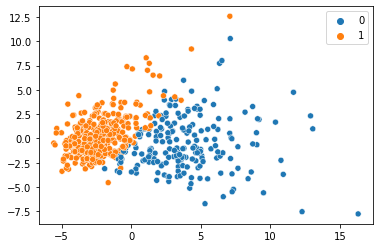

In [51]:
# Alternativamente, podemos construir el conjunto que acomode el 95% de la variaza 
# del siguiente modo
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

# Una buena práctica es visualizar la relación de las principales componentes
import seaborn as sns
sns.scatterplot(X_pca_95[:, 0], X_pca_95[:, 1], hue=cancer_data.target)

In [58]:
# Finalmente podemos crear un nuevo marco de datos con el resultado del análisis PCA
cols = ['PCA' + str(i) for i in range(10)]
df_pca = pd.DataFrame(X_pca_95, columns=cols)
print("Datos (PCA - 95%):\n", df_pca)


Datos (PCA - 95%):
           PCA0       PCA1      PCA2  ...      PCA7      PCA8      PCA9
0     9.192837   1.948583 -1.123166  ... -0.398407 -0.157118 -0.877402
1     2.387802  -3.768172 -0.529293  ...  0.240988 -0.711905  1.106995
2     5.733896  -1.075174 -0.551748  ...  0.097374  0.024066  0.454275
3     7.122953  10.275589 -3.232790  ...  1.059565 -1.405440 -1.116975
4     3.935302  -1.948072  1.389767  ...  0.636376 -0.263805  0.377704
..         ...        ...       ...  ...       ...       ...       ...
564   6.439315  -3.576817  2.459487  ... -0.035471  0.987929  0.256989
565   3.793382  -3.584048  2.088476  ... -1.113360 -0.105207 -0.108632
566   1.256179  -1.902297  0.562731  ...  0.341887  0.393917  0.520877
567  10.374794   1.672010 -1.877029  ... -0.280239 -0.542035 -0.089296
568  -5.475243  -0.670637  1.490443  ...  1.046354  0.374101 -0.047726

[569 rows x 10 columns]
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e

## Análisis de Componentes Independientes (ICA)

In [ ]:
# Utilizaremos datos de fMRI para nuestro ejemplo con ICA
# Para ello, comenzamos instalando la librería nilearn  
!python -m pip install nilearn

In [62]:
from nilearn import datasets
# Descargamos un sujeto del estudio con RM funcional
dataset = datasets.fetch_development_fmri(n_subjects=1)
file_name = dataset.func[0]

# Preprocesado de la imagen
from nilearn.input_data import NiftiMasker

# Aplicamos una máscara para extraer el fondo de la imagen (vóxeles no cerebrales)
masker = NiftiMasker(smoothing_fwhm=8, memory='nilearn_cache', memory_level=1,
                     mask_strategy='epi', standardize=True)
data_masked = masker.fit_transform(file_name)

In [ ]:
from sklearn.decomposition import FastICA
import numpy as np
# Seleccionamos 10 componentes 
ica = FastICA(n_components=10, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T
# Aplicamos un corte (80% señal) en los datos después de normalizar según 
# la media y desviación estándar de los datos
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
components_masked[np.abs(components_masked) < .8] = 0
# Invertimos la transformación para recuperar la estructura 3D
component_img = masker.inverse_transform(components_masked)

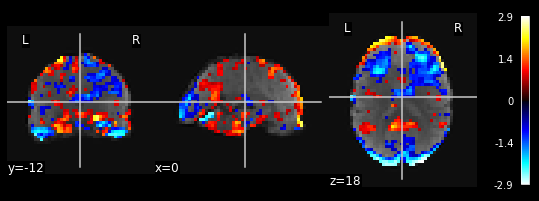

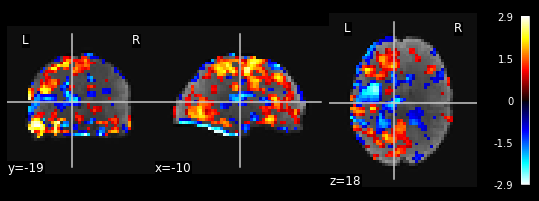

In [70]:
# Finalmete, visualizamos el resultado de las operaciones de reducción
from nilearn import image
from nilearn.plotting import plot_stat_map, show
mean_img = image.mean_img(func_filename)
plot_stat_map(image.index_img(component_img, 0), mean_img)
plot_stat_map(image.index_img(component_img, 1), mean_img)